In [68]:
import re

In [69]:

import os
master_array = [] #append results to array to create data frame
folder = './Friends/'

for filename in os.listdir(folder):
  if filename.endswith('.txt'):
    pattern = re.compile(r'(?<=\d)\s')
    name = filename.strip('.txt')#obtain the season and episodes
    split_name = re.split(pattern, name)
    seasonep = split_name[0]
    if '-' in seasonep:
      pattern = re.compile(r'-')
      split_seasons = re.split(pattern, seasonep)
      x = split_seasons[0]
      y = split_seasons[1]
      pattern = re.compile(r'E')
      x_split = re.split(pattern, x)
      y_split = re.split(pattern, y)
      season = x_split[0]
      episode = (int(x_split[1]) + int(y_split[1]))/2
      episode_name = split_name[1]
    else:
      pattern = re.compile(r'E')
      split_season = re.split(pattern, seasonep)   
      season = split_season[0]
      # print(season)
      episode = split_season[1]
      episode_name = split_name[1]

    with open(folder + filename, 'r', encoding='UTF-8') as f:
      lines = f.readlines() #read the script file
      pattern = re.compile(r'\w+:\s') # store the regex
      for line in lines:
        result = re.match(pattern, line)
        if result is not None: # split the script where our pattern matched (pink dot)
          split_line = line.split(':')
          character = split_line[0]
          speech = split_line[1].strip()
          line= [seasonep, season, episode, episode_name, character, speech]
          master_array.append(line)
        else:
          pass


In [70]:
import pandas as pd

friends = pd.DataFrame(master_array, columns=['id', 'season', 'episode', 'episode_name', 'character', 'line'])

In [71]:
friends.sample(20)

id season episode               episode_name character  \
33544  S06E19    S06      19               Joeys Fridge      Ross   
44522  S08E13    S08      13      Chandler Takes A Bath    Monica   
26000  S05E13    S05      13                  Joeys Bag  Chandler   
34997  S06E24    S06      24    The Proposal Part I  II      Ross   
29391  S06E02    S06      02           Ross Hugs Rachel    Phoebe   
46713  S08E22    S08      22             Rachel Is Late      Joey   
21708  S04E19    S04      19              All The Haste      Joey   
36924  S07E08    S07      08  Chandler Doesnt Like Dogs    Monica   
18741  S04E07    S04      07  Chandler Crosses The Line      Joey   
278    S01E01    S01      01     Monica Gets A Roommate      Ross   
7789   S02E10    S02      10                       Russ      PHOE   
57248  S10E13    S10      13         Joey Speaks French      Ross   
42942  S08E06    S08      06        The Halloween Party      Eric   
37613  S07E10    S07      10      The Huliday Armadillo  Chandler   
49192  S09E08    S09      08       Rachels Other Sister    Rachel   
45639  S08E18    S08      18              In Massapequa  Chandler   
4298   S01E19    S01      19       The Monkey Gets Away    Monica   
56575  S10E11    S10      11         The Stripper Cries      Ross   
45956  S08E19    S08      19            Joeys Interview    Phoebe   
15274  S03E18    S03      18          The Hypnosis Tape      Joey   

                                                    line  
33544                                          Is this?!  
44522                                        Absolutely.  
26000    Okay, you give the worst massages in the world.  
34997  That’s impossible! I mean we have had a deal f...  
29391  I don’t want to go into the whole thing, but u...  
46713                                            Please!  
21708  Yes! Didn’t you ever read Sports Illustrated?!...  
36924  All right, I'm out of oven space. I'm gonna tu...  
18741  Y’know what I think? I think somebody’s got a ...  
278    I just grabbed a spoon. (Ross exits and Monica...  
7789                          OK, noone is named Sleeve.  
57248                              ...Valentine's day...  
42942  I think we’ll be okay. Besides it’s so perfect...  
37613  My favorite part was when Superman flew all th...  
49192  Look Amy, it got a little of control..Um.. and...  
45639         And you wonder why Ross is their favorite?  
4298   Okay, you stay here, and just wait by the phon...  
56575  (thinks about it for a few seconds) What did y...  
45956  Oh okay, it’s P as in Phoebe, H as in hoebe, O...  
15274                       Yeah, or-or to get a hooker.

In [72]:
# Ensure all names are refering to the correct person
print(sorted(friends['character'].unique()))
friends['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                    'JOEY':'Joey',
                    'MNCA':'Monica','MONICA':'Monica',
                    'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                    'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                    'ROSS':'Ross'},inplace=True)

['ALISON', 'ALL', 'AMBER', 'AMGER', 'Actor', 'Adrienne', 'Alan', 'Alex', 'Alice', 'All', 'Allesandro', 'Amanda', 'Amy', 'Anchorwoman', 'Andrea', 'Angela', 'Annabelle', 'Announcer', 'Arthur', 'Ashley', 'Assistant', 'Attendant', 'Aurora', 'BARRY', 'BEN', 'BILL', 'BOTH', 'BOYS', 'Ballerina', 'Bandleader', 'Barry', 'Ben', 'Benjamin', 'Bernice', 'Bill', 'Billy', 'Bitsy', 'Bob', 'Bobby', 'Bonnie', 'Boss', 'Both', 'Boy', 'Brenda', 'Burt', 'CAROL', 'CAROLINE', 'CHAN', 'CHANDLER', 'Cailin', 'Caitlin', 'Carl', 'Carol', 'Casey', 'Cashier', 'Cassie', 'Catherine', 'Cecilia', 'Celia', 'Chandler', 'Chandlers', 'Charlie', 'Cheryl', 'Chip', 'Chloe', 'Claudia', 'Clerk', 'Cliff', 'Clown', 'Colleen', 'Commercial', 'Conan', 'Cookie', 'Cop', 'Courtney', 'Cowgirl', 'Croupler', 'Customer', 'Customers', 'Cynthia', 'DIRECTOR', 'DOCTOR', 'DUNCAN', 'Dan', 'Dana', 'Danielle', 'Danny', 'Dave', 'David', 'Devon', 'Dina', 'Director', 'Dirk', 'Doctor', 'Don', 'Donny', 'Doug', 'Drew', 'EDDIE', 'ERICA', 'ERNIE', 'ESTELLE

In [73]:
friends['character'].value_counts()[:6]

Rachel      9285
Ross        9098
Chandler    8461
Monica      8386
Joey        8215
Phoebe      7473
Name: character, dtype: int64

In [74]:
def remove_stagedir(txt):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in txt:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret
    
friends['line'] = friends.line.apply(remove_stagedir)

friends.sample(20)


id season episode                         episode_name  \
13158         S03E09    S03      09                         The Football   
4991          S01E22    S01      22                       The Ick Factor   
33029         S06E17    S06      17                                Unagi   
39998         S07E20    S07      20                     Rachels Big Kiss   
45398         S08E16    S08      16                    Joey Tells Rachel   
25075         S05E09    S05      09                       Rosss Sandwich   
12397         S03E06    S03      06                        The Flashback   
48497         S09E06    S09      06                       The Male Nanny   
13912         S03E12    S03      12                     All The Jealousy   
54250         S10E03    S10      03                            Rosss Tan   
25568         S05E11    S05      11                  All The Resolutions   
2986          S01E13    S01      13                          The Boobies   
4716          S01E21    S01      21                      The Fake Monica   
29177         S06E02    S06      02                     Ross Hugs Rachel   
17703         S04E03    S04      03                            The Cuffs   
53380  S09E23-S09E24    S09    23.5                          In Barbados   
37427         S07E10    S07      10                The Huliday Armadillo   
34645         S06E24    S06      24              The Proposal Part I  II   
13492         S03E11    S03      11  Chandler Cant Remember Which Sister   
29199         S06E02    S06      02                     Ross Hugs Rachel   

      character                                               line  
13158    Monica                           Honey, there’s a reason.  
4991     Monica                                             Ethan?  
33029  Chandler                         I am so, so, so, so sorry!  
39998      Joey                       Who you what? Who you what?!  
45398      Joey                                              But.   
25075      Ross  Unbelievable! I mean you really kept Joey's un...  
12397    Phoebe  Yeah, I would’ve except I had a big spaghetti ...  
48497    Phoebe     A-Allright, well... I'll call the cab company.  
13912    Rachel  Noo, I y'know I don't see why she has to play ...  
54250    Phoebe                      Oh my God. Was Mike with him?  
25568    Rachel  Chandler and Monica?!! Oh, this is unbelievabl...  
2986        All                                       Hey, Pheebs.  
4716     Monica          Oh really? Okay, let's compare, shall we.  
29177    Phoebe                                          Hey Rach!  
17703      Joey                                              Huh?!  
53380    Rachel                               You know? Forget it!  
37427  Chandler  No! No, she didn't say that. I-I-I think you s...  
34645    Rachel                               How about you guys?   
13492      Ross  Well, I’m just saying, I mean why else would h...  
29199    Monica                   Wait! Joey! Joey! Are you okay?!

In [75]:
friends['season'] = friends['season'].apply(lambda x : re.sub(r'S0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : re.sub(r's0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : float(x))
friends['episode'] = friends['episode'].apply(lambda x : float(x))
friends.head()

id  season  episode            episode_name character  \
0  S01E01     1.0      1.0  Monica Gets A Roommate    Monica   
1  S01E01     1.0      1.0  Monica Gets A Roommate      Joey   
2  S01E01     1.0      1.0  Monica Gets A Roommate  Chandler   
3  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   

                                                line  
0  There's nothing to tell! He's just some guy I ...  
1  C'mon, you're going out with the guy! There's ...  
2  All right Joey, be nice.  So does he have a hu...  
3                           Wait, does he eat chalk?  
4  Just, 'cause, I don't want her to go through w...

In [89]:
print(friends.id.unique())
# there should be ten seasons
print(friends.season.unique())
# all numbers from 1 to 25 should be present
friends.episode.unique()

['S01E01' 'S01E02' 'S01E03' 'S01E04' 'S01E05' 'S01E06' 'S01E07' 'S01E08'
 'S01E09' 'S01E10' 'S01E11' 'S01E12' 'S01E13' 'S01E14' 'S01E15' 'S01E16'
 'S01E17' 'S01E18' 'S01E19' 'S01E20' 'S01E21' 'S01E22' 'S01E23' 'S01E24'
 'S02E01' 'S02E02' 'S02E03' 'S02E04' 'S02E05' 'S02E06' 'S02E07' 'S02E08'
 'S02E09' 'S02E10' 'S02E11' 'S02E12-S02E13' 'S02E14' 'S02E15' 'S02E16'
 'S02E17' 'S02E18' 'S02E19' 'S02E20' 'S02E21' 'S02E22' 'S02E23' 'S02E24'
 'S03E01' 'S03E02' 'S03E03' 'S03E04' 'S03E05' 'S03E06' 'S03E07' 'S03E08'
 'S03E09' 'S03E10' 'S03E11' 'S03E12' 'S03E13' 'S03E14' 'S03E15' 'S03E16'
 'S03E17' 'S03E18' 'S03E19' 'S03E20' 'S03E21' 'S03E22' 'S03E23' 'S03E24'
 's03E25' 'S04E01' 'S04E02' 'S04E03' 'S04E04' 'S04E05' 'S04E06' 'S04E07'
 'S04E08' 'S04E09' 'S04E10' 'S04E11' 'S04E12' 'S04E13' 'S04E14' 'S04E15'
 'S04E16' 'S04E17' 'S04E18' 'S04E19' 'S04E20' 'S04E21' 'S04E22' 'S04E23'
 'S05E01' 'S05E02' 'S05E03' 'S05E04' 'S05E05' 'S05E06' 'S05E07' 'S05E08'
 'S05E09' 'S05E10' 'S05E11' 'S05E12' 'S05E13' 'S05E14

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. ,
       12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. ,
       23. , 24. , 12.5, 25. , 15.5, 23.5, 17.5])

In [90]:
friends['len'] = friends.line.apply(len)
friends.head()
friends['len'].sum()

3047509

In [91]:
groups = friends.groupby('id')

eplen = [groups.get_group(group)['len'].sum() for group in groups.groups]

In [92]:
print(eplen)

[16424, 10709, 12313, 12290, 12660, 12642, 10160, 8470, 12344, 12397, 10888, 11188, 10635, 10126, 12430, 12568, 10449, 11179, 12659, 13475, 9764, 10204, 11417, 12726, 11779, 10171, 11584, 12509, 13292, 11856, 11938, 12391, 12416, 14418, 11309, 22592, 11081, 8716, 10763, 12009, 12264, 13562, 15805, 11766, 11100, 12710, 11711, 11851, 15040, 12947, 14701, 12616, 11051, 11573, 12792, 13494, 13693, 13709, 13219, 11663, 12717, 13267, 14186, 14886, 13491, 12548, 12920, 13981, 11983, 12768, 14019, 10317, 11992, 10728, 9478, 11640, 12539, 12044, 13714, 13943, 12871, 12235, 12235, 13585, 13533, 12994, 12008, 12783, 13075, 11913, 10895, 11897, 13125, 23991, 11385, 12479, 10742, 12179, 12023, 12913, 12234, 9760, 11700, 13804, 11920, 13317, 11544, 12301, 13691, 12421, 12166, 13923, 13596, 13346, 15032, 14270, 23264, 11803, 14514, 15197, 12131, 14392, 13848, 14054, 13388, 13459, 12388, 14283, 13978, 12640, 13358, 25296, 11128, 13965, 14300, 12611, 14411, 12032, 13469, 26208, 13290, 11806, 13323, 131

<function matplotlib.pyplot.show(close=None, block=None)>

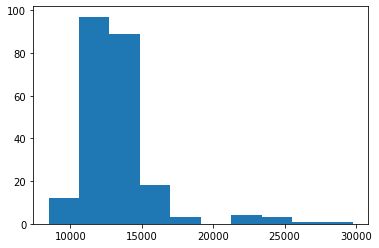

In [93]:
import matplotlib.pyplot as plt
plt.hist(eplen)
plt.show

### preprocessing friends

In [94]:
import os
import json
import glob
import shutil

# limit to only three tags in Universal Part-of-Speech tagset
allowed = set('ADJ NOUN VERB'.split())

In [95]:
# !python -m spacy validate
# !python -m spacy download nl_core_news_sm
# !python -m spacy download en_core_web_sm

In [96]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def prep(txt):
    toklst = []
    tokens = nlp(txt)
    if tokens:
        for t in tokens:
            if t.pos_ in allowed and t.is_alpha and not t.is_stop:
                toklst.append(t.text)
    return ' '.join(toklst).casefold()
                

In [97]:
friends['prepped'] = friends.line.apply(prep)

In [98]:
friends.head()

id  season  episode            episode_name character  \
0  S01E01     1.0      1.0  Monica Gets A Roommate    Monica   
1  S01E01     1.0      1.0  Monica Gets A Roommate      Joey   
2  S01E01     1.0      1.0  Monica Gets A Roommate  Chandler   
3  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   

                                                line  len  \
0  There's nothing to tell! He's just some guy I ...   56   
1  C'mon, you're going out with the guy! There's ...   80   
2  All right Joey, be nice.  So does he have a hu...   73   
3                           Wait, does he eat chalk?   24   
4  Just, 'cause, I don't want her to go through w...   79   

                    prepped  
0             tell guy work  
1       going guy got wrong  
2  nice hump hump hairpiece  
3            wait eat chalk  
4                 want went

In [99]:
friends['len_prep'] = friends.prepped.apply(len)
friends.head()
friends['len_prep'].sum()

950404

In [100]:
import numpy as np
#calculate average episode length
friends_red = friends[friends['id'].str.isalnum() == True]
# print(friends_red['id'].unique())

grouped = friends_red.groupby('id')
print(np.mean(grouped['len_prep'].agg(sum)))

4099.700892857143


In [101]:
friends.to_csv('friends_per_line.tsv', sep='\t')

### ratings

In [148]:
import pandas as pd
friends = pd.read_csv('friends_per_line.tsv', sep='\t', index_col=0)
ratings = pd.read_csv('./Friends/friends_episodes_v3.csv')
ratings.head()
friends.head()

id  season  episode            episode_name character  \
0  S01E01     1.0      1.0  Monica Gets A Roommate    Monica   
1  S01E01     1.0      1.0  Monica Gets A Roommate      Joey   
2  S01E01     1.0      1.0  Monica Gets A Roommate  Chandler   
3  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01     1.0      1.0  Monica Gets A Roommate    Phoebe   

                                                line  len  \
0  There's nothing to tell! He's just some guy I ...   56   
1  C'mon, you're going out with the guy! There's ...   80   
2  All right Joey, be nice.  So does he have a hu...   73   
3                           Wait, does he eat chalk?   24   
4  Just, 'cause, I don't want her to go through w...   79   

                    prepped  len_prep  
0             tell guy work        13  
1       going guy got wrong        19  
2  nice hump hump hairpiece        24  
3            wait eat chalk        14  
4                 want went         9

In [149]:
ratings.head()

Year_of_prod  Season  Episode Number  \
0          1994       1               1   
1          1994       1               2   
2          1994       1               3   
3          1994       1               4   
4          1994       1               5   

                                     Episode_Title  Duration  \
0  The One Where Monica Gets a Roommate: The Pilot        22   
1             The One with the Sonogram at the End        22   
2                           The One with the Thumb        22   
3               The One with George Stephanopoulos        22   
4   The One with the East German Laundry Detergent        22   

                                             Summary       Director  Stars  \
0  Monica and the gang introduce Rachel to the "r...  James Burrows    8.3   
1  Ross finds out his ex-wife is pregnant. Rachel...  James Burrows    8.1   
2  Monica becomes irritated when everyone likes h...  James Burrows    8.2   
3  Joey and Chandler take Ross to a hockey game t...  James Burrows    8.1   
4  Eager to spend time with Rachel, Ross pretends...  Pamela Fryman    8.5   

   Votes  
0   7440  
1   4888  
2   4605  
3   4468  
4   4438

In [150]:
friends_red = friends[friends['id'].str.isalnum() == True]
double_episodes = friends[friends['id'].str.isalnum() == False]
print(len(friends.groupby('id')))
print(len(friends_red.groupby('id')))
print(len(double_episodes.groupby('id')))
len(ratings)

228
224
4


236

In [151]:
friends.id.unique()

array(['S01E01', 'S01E02', 'S01E03', 'S01E04', 'S01E05', 'S01E06',
       'S01E07', 'S01E08', 'S01E09', 'S01E10', 'S01E11', 'S01E12',
       'S01E13', 'S01E14', 'S01E15', 'S01E16', 'S01E17', 'S01E18',
       'S01E19', 'S01E20', 'S01E21', 'S01E22', 'S01E23', 'S01E24',
       'S02E01', 'S02E02', 'S02E03', 'S02E04', 'S02E05', 'S02E06',
       'S02E07', 'S02E08', 'S02E09', 'S02E10', 'S02E11', 'S02E12-S02E13',
       'S02E14', 'S02E15', 'S02E16', 'S02E17', 'S02E18', 'S02E19',
       'S02E20', 'S02E21', 'S02E22', 'S02E23', 'S02E24', 'S03E01',
       'S03E02', 'S03E03', 'S03E04', 'S03E05', 'S03E06', 'S03E07',
       'S03E08', 'S03E09', 'S03E10', 'S03E11', 'S03E12', 'S03E13',
       'S03E14', 'S03E15', 'S03E16', 'S03E17', 'S03E18', 'S03E19',
       'S03E20', 'S03E21', 'S03E22', 'S03E23', 'S03E24', 's03E25',
       'S04E01', 'S04E02', 'S04E03', 'S04E04', 'S04E05', 'S04E06',
       'S04E07', 'S04E08', 'S04E09', 'S04E10', 'S04E11', 'S04E12',
       'S04E13', 'S04E14', 'S04E15', 'S04E16', 'S04E17'

In [152]:
def fuck(df):
    season = int(df[1])
    ep = int(df[2])
    df['match'] = str(season) + str(ep)
    return df

friends = friends.apply(fuck, axis=1)

In [153]:
ratings = ratings.apply(fuck, axis=1)
print(friends['match'][0])
print(ratings['match'][0])

11
11


In [154]:
from numpy import NaN

friends.sort_index(inplace=True)
ratings.sort_index(inplace=True)

groups = friends.groupby('id')
ratings["text"] = NaN
ratings["len in words"] = NaN
ratings["len_prep"] = NaN

for group in groups.groups:
    ep = groups.get_group(group)
    ep.reset_index(drop=True, inplace=True)
    matcher = ep['match'][0]
    # print(matcher)
    tekst = ep['prepped'].dropna()
    text = ' '.join(tekst)
    text = ' '.join(text.split())
    # print(text[:10])
    lenght = ep['len'].sum()

    lenght_prep = ep['len_prep'].sum()


    index = ratings[ratings['match'] == matcher].index
    print(index)
    ratings.iloc[index, 10] = text
    ratings.iloc[index, 11] = lenght
    ratings.iloc[index, 12] = lenght_prep

Int64Index([0], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([3], dtype='int64')
Int64Index([4], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([6], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([8], dtype='int64')
Int64Index([9], dtype='int64')
Int64Index([10], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([13], dtype='int64')
Int64Index([14], dtype='int64')
Int64Index([15], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([18], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([20], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([22], dtype='int64')
Int64Index([23], dtype='int64')
Int64Index([24], dtype='int64')
Int64Index([25], dtype='int64')
Int64Index([26], dtype='int64')
Int64Index([27], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([30], dtype='int64')
Int64Index([31], d

In [155]:
ratings.head()

Year_of_prod  Season  Episode Number  \
0          1994       1               1   
1          1994       1               2   
2          1994       1               3   
3          1994       1               4   
4          1994       1               5   

                                     Episode_Title  Duration  \
0  The One Where Monica Gets a Roommate: The Pilot        22   
1             The One with the Sonogram at the End        22   
2                           The One with the Thumb        22   
3               The One with George Stephanopoulos        22   
4   The One with the East German Laundry Detergent        22   

                                             Summary       Director  Stars  \
0  Monica and the gang introduce Rachel to the "r...  James Burrows    8.3   
1  Ross finds out his ex-wife is pregnant. Rachel...  James Burrows    8.1   
2  Monica becomes irritated when everyone likes h...  James Burrows    8.2   
3  Joey and Chandler take Ross to a hockey game t...  James Burrows    8.1   
4  Eager to spend time with Rachel, Ross pretends...  Pamela Fryman    8.5   

   Votes match                                               text  \
0   7440    11  tell guy work going guy got wrong nice hump hu...   
1   4888    12  guys understand kissing important need know ki...   
2   4605    13  hi guys good walked subway said ouch said good...   
3   4468    14  omnipotent day want world peace hunger good th...   
4   4438    15  let big deal big deal amazing reach little man...   

   len in words  len_prep  
0       16424.0    5280.0  
1       10709.0    3170.0  
2       12313.0    3689.0  
3       12290.0    4041.0  
4       12660.0    3859.0

In [156]:
#the double episodes are "fixed" in a hacky way

indexes = ratings[ratings['text'].isna() ==True].index.to_list()
indexes2 = [index-1 for index in indexes]
indexes3 = indexes + indexes2
indexes3.sort()
ratings.iloc[indexes3, :]

Year_of_prod  Season  Episode Number  \
35           1996       2              12   
36           1996       2              13   
95           1998       4              23   
96           1998       4              24   
119          1999       5              23   
120          1999       5              24   
135          2000       6              15   
136          2000       6              16   
144          2000       6              24   
145          2000       6              25   
192          2002       8              23   
193          2002       8              24   
216          2003       9              23   
217          2003       9              24   
234          2004      10              17   
235          2004      10              18   

                               Episode_Title  Duration  \
35       The One After the Superbowl: Part 1        22   
36       The One After the Superbowl: Part 2        22   
95               The One with Ross's Wedding        30   
96               The One with Ross's Wedding        30   
119                 The One in Vegas: Part 1        22   
120                 The One in Vegas: Part 2        22   
135             The One That Could Have Been        30   
136             The One That Could Have Been        30   
144                The One with the Proposal        30   
145                The One with the Proposal        30   
192  The One Where Rachel Has a Baby: Part 1        22   
193  The One Where Rachel Has a Baby: Part 2        22   
216                      The One in Barbados        22   
217                      The One in Barbados        22   
234                     The Last One: Part 1        30   
235                     The Last One: Part 2        30   

                                               Summary         Director  \
35   Ross goes to visit Marcel whilst on a trip to ...  Michael Lembeck   
36   Ross finds Marcel on the set of a new movie, w...  Michael Lembeck   
95   Phoebe tries to help Rachel deal with her feel...     Kevin Bright   
96   Phoebe tries to warn the gang that Rachel is c...     Kevin Bright   
119  The gang go to Las Vegas to visit Joey. Chandl...     Kevin Bright   
120  Chandler and Monica reconcile and hastily deci...     Kevin Bright   
135  When Rachel hears Barry and Mindy are getting ...  Michael Lembeck   
136  The gang continue to think about how different...  Michael Lembeck   
144  Chandler's plan to propose to Monica at dinner...     Kevin Bright   
145  Chandler continues to pretend to hate the idea...     Kevin Bright   
192  Ross and Rachel go to the hospital to have the...     Kevin Bright   
193  After Rachel gives birth to her baby, she must...     Kevin Bright   
216  Chandler gives advice to David, but that makes...     Kevin Bright   
217  To the other friends' fury, it keeps raining e...     Kevin Bright   
234  Erica gives birth to the baby that Monica and ...     Kevin Bright   
235  Phoebe races Ross to the airport in a bid to s...     Kevin Bright   

     Stars  Votes match                                               text  \
35     8.6   3723   212  commercial makes sad guy opens beer girls run ...   
36     8.8   3864   213                                                NaN   
95     8.7   3343   423  guys hurry flight leaves hours time taxi traff...   
96     9.2   4217   424                                                NaN   
119    8.8   3282   523  lazy touchie people entire world want talk lis...   
120    9.1   3726   524                                                NaN   
135    8.5   3097   615  guys guess getting divorce matter hear divorce...   
136    8.5   3037   616                                                NaN   
144    8.8   3065   624  beautiful engagement ring know bought tonight ...   
145    9.3   4186   625                                                NaN   
192    8.8   2906   823  hospital minutes hard come great start knew go...   
193    8.9   3150   824                 

In [159]:
#the above are all double episodes, with the text
for index in indexes2:
    tekst = ratings.iloc[index, 10].split()
    lenwords = ratings.iloc[index, 11]/2
    lenprep = ratings.iloc[index, 12]/2
    ratings.iloc[index, 10] = ' '.join(tekst[:int(len(tekst)/2)])
    ratings.iloc[index, 11] = lenwords
    ratings.iloc[index, 12] = lenprep
    ratings.iloc[index+1, 10] = ' '.join(tekst[int(len(tekst)/2):])
    ratings.iloc[index+1, 11] = lenwords
    ratings.iloc[index+1, 12] = lenprep

In [160]:
ratings.iloc[indexes3, :]

Year_of_prod  Season  Episode Number  \
35           1996       2              12   
36           1996       2              13   
95           1998       4              23   
96           1998       4              24   
119          1999       5              23   
120          1999       5              24   
135          2000       6              15   
136          2000       6              16   
144          2000       6              24   
145          2000       6              25   
192          2002       8              23   
193          2002       8              24   
216          2003       9              23   
217          2003       9              24   
234          2004      10              17   
235          2004      10              18   

                               Episode_Title  Duration  \
35       The One After the Superbowl: Part 1        22   
36       The One After the Superbowl: Part 2        22   
95               The One with Ross's Wedding        30   
96               The One with Ross's Wedding        30   
119                 The One in Vegas: Part 1        22   
120                 The One in Vegas: Part 2        22   
135             The One That Could Have Been        30   
136             The One That Could Have Been        30   
144                The One with the Proposal        30   
145                The One with the Proposal        30   
192  The One Where Rachel Has a Baby: Part 1        22   
193  The One Where Rachel Has a Baby: Part 2        22   
216                      The One in Barbados        22   
217                      The One in Barbados        22   
234                     The Last One: Part 1        30   
235                     The Last One: Part 2        30   

                                               Summary         Director  \
35   Ross goes to visit Marcel whilst on a trip to ...  Michael Lembeck   
36   Ross finds Marcel on the set of a new movie, w...  Michael Lembeck   
95   Phoebe tries to help Rachel deal with her feel...     Kevin Bright   
96   Phoebe tries to warn the gang that Rachel is c...     Kevin Bright   
119  The gang go to Las Vegas to visit Joey. Chandl...     Kevin Bright   
120  Chandler and Monica reconcile and hastily deci...     Kevin Bright   
135  When Rachel hears Barry and Mindy are getting ...  Michael Lembeck   
136  The gang continue to think about how different...  Michael Lembeck   
144  Chandler's plan to propose to Monica at dinner...     Kevin Bright   
145  Chandler continues to pretend to hate the idea...     Kevin Bright   
192  Ross and Rachel go to the hospital to have the...     Kevin Bright   
193  After Rachel gives birth to her baby, she must...     Kevin Bright   
216  Chandler gives advice to David, but that makes...     Kevin Bright   
217  To the other friends' fury, it keeps raining e...     Kevin Bright   
234  Erica gives birth to the baby that Monica and ...     Kevin Bright   
235  Phoebe races Ross to the airport in a bid to s...     Kevin Bright   

     Stars  Votes match                                               text  \
35     8.6   3723   212  commercial makes sad guy opens beer girls run ...   
36     8.8   3864   213  closed set know friends monkey good morning pa...   
95     8.7   3343   423  guys hurry flight leaves hours time taxi traff...   
96     9.2   4217   424  think miss birds babies babies miss pizza guy ...   
119    8.8   3282   523  lazy touchie people entire world want talk lis...   
120    9.1   3726   524  gon believe found identical hand twin identica...   
135    8.5   3097   615  guys guess getting divorce matter hear divorce...   
136    8.5   3037   616  opportunities mean waiting perfect guy seeing ...   
144    8.8   3065   624  beautiful engagement ring know bought tonight ...   
145    9.3   4186   625  complement chef better great seeing night good...   
192    8.8   2906   823  hospital minutes hard come great start knew go...   
193    8.9   3150   824  stuff wrong ans

<AxesSubplot:ylabel='Frequency'>

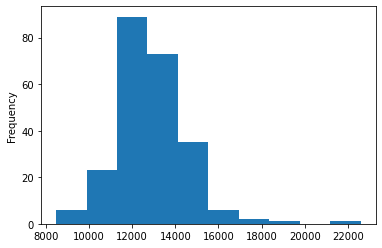

In [162]:
ratings['len in words'].plot(kind='hist')

In [164]:
ratings['Stars'].plot()

<AxesSubplot:>

In [168]:
stars = ratings['Stars']
t_average = stars.rolling(window=5).mean()

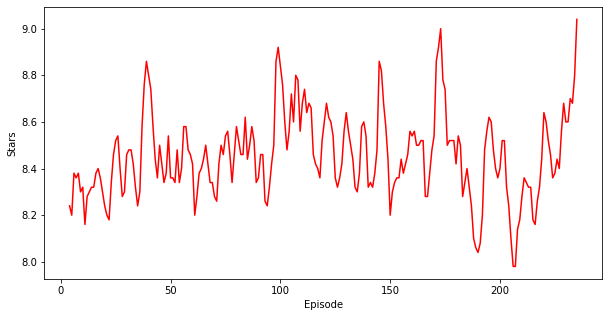

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(t_average, 'r-', label='Running average stars per 5 episodes')
plt.ylabel('Stars')
plt.xlabel('Episode')
plt.show()

<AxesSubplot:>

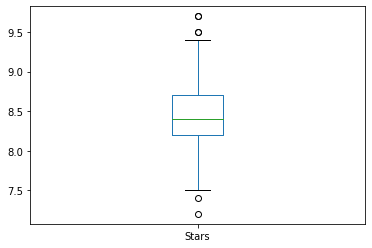

In [166]:
ratings['Stars'].plot(kind='box')

In [171]:
ratings.to_csv('friends_text_ratings.csv')